# **EDA For Listings**

-----
### Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

from sklearn.cluster import KMeans, DBSCAN

------
## Read in the Data

In [84]:
listings = pd.read_csv('../data/listings_cleaned.csv')
listings.head(2)

,id,last_scraped,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms,bathrooms_shared,amenities_count,host_verifications_count
0,3781,2021-09-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,3,100.0,0,...,0,1,1,0,0,0.29,1.0,0,31,3
1,5506,2021-09-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19,3,100.0,1,...,0,10,10,0,0,0.90,1.0,0,30,4


In [85]:
listings.dtypes

id                                                int64
last_scraped                                     object
name                                             object
description                                      object
host_id                                           int64
host_name                                        object
host_since                                       object
host_response_time                                int64
host_response_rate                              float64
host_is_superhost                                 int64
abnb_host_listings_count                        float64
host_verifications                               object
host_has_profile_pic                              int64
host_identity_verified                            int64
neighborhood                                     object
latitude                                        float64
longitude                                       float64
property_type                                   

In [86]:
# converting date columns to date time
# and breaking out by year and month
# for analysis
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')

In [87]:
listings['last_scraped_year'] = listings['last_scraped'].dt.year 
listings['last_scraped_month'] = listings['last_scraped'].dt.month
listings[['last_scraped_year','last_scraped_month']].head(3)

,last_scraped_year,last_scraped_month
0,2021,9
1,2021,9
2,2021,9


In [88]:
listings['host_since'] = pd.to_datetime(listings['host_since'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['host_since_year'] = listings['host_since'].dt.year 
listings['host_since_month'] = listings['host_since'].dt.month

In [89]:
listings['calendar_last_scraped'] = pd.to_datetime(listings['calendar_last_scraped'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['calendar_last_scraped_year'] = listings['calendar_last_scraped'].dt.year 
listings['calendar_last_scraped_month'] = listings['calendar_last_scraped'].dt.month

In [90]:
listings['first_review'] = pd.to_datetime(listings['first_review'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['first_review_year'] = listings['first_review'].dt.year 
listings['first_review_month'] = listings['first_review'].dt.month

In [91]:
listings['last_review'] = pd.to_datetime(listings['last_review'],
                                          format = '%Y-%m-%d',
                                          errors = 'coerce')
listings['last_review_year'] = listings['last_review'].dt.year 
listings['last_review_month'] = listings['last_review'].dt.month

In [92]:
listings.dtypes

id                                                       int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
host_id                                                  int64
host_name                                               object
host_since                                      datetime64[ns]
host_response_time                                       int64
host_response_rate                                     float64
host_is_superhost                                        int64
abnb_host_listings_count                               float64
host_verifications                                      object
host_has_profile_pic                                     int64
host_identity_verified                                   int64
neighborhood                                            object
latitude                                               

-------
### **Exploring Listings Data Frame**

In [93]:
sql = """
SELECT *
FROM listings
LIMIT 5;
"""

df = sqldf(sql)
df.head()

,id,last_scraped,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,last_scraped_year,last_scraped_month,host_since_year,host_since_month,calendar_last_scraped_year,calendar_last_scraped_month,first_review_year,first_review_month,last_review_year,last_review_month
0,3781,2021-09-19 00:00:00.000000,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03 00:00:00.000000,3,100.0,0,...,2021,9,2008,12,2021,9,2015,10,2021,7
1,5506,2021-09-19 00:00:00.000000,** Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19 00:00:00.000000,3,100.0,1,...,2021,9,2009,2,2021,9,2011,10,2021,7
2,6695,2021-09-19 00:00:00.000000,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...",8229,Terry,2009-02-19 00:00:00.000000,3,100.0,1,...,2021,9,2009,2,2021,9,2014,8,2019,11
3,8789,2021-09-19 00:00:00.000000,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,26988,Anne,2009-07-22 00:00:00.000000,3,100.0,1,...,2021,9,2009,7,2021,9,2014,12,2019,9
4,10730,2021-09-19 00:00:00.000000,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",26988,Anne,2009-07-22 00:00:00.000000,3,100.0,1,...,2021,9,2009,7,2021,9,2015,3,2020,4


-----
### Overall 

In [94]:
sql = """
SELECT COUNT(DISTINCT id) AS distinct_listings, COUNT(id) AS all_listings
FROM listings;
"""

df = sqldf(sql)
df.head()

,distinct_listings,all_listings
0,4225,10664


In [95]:
listings.describe()
# earliest hosts from 2008 (AirBNB launched August 2008, VRBO in 1995)
# earliest reviews from 2009

,id,host_id,host_response_time,host_response_rate,host_is_superhost,abnb_host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,...,last_scraped_year,last_scraped_month,host_since_year,host_since_month,calendar_last_scraped_year,calendar_last_scraped_month,first_review_year,first_review_month,last_review_year,last_review_month
count,1.066400e+04,1.066400e+04,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,...,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,1.572555e+16,1.095121e+08,2.673668,96.265566,0.337678,49.717086,0.998312,0.828395,42.339632,-71.084715,...,2021.575863,7.214741,2015.569674,6.866185,2021.575863,7.214741,2018.437172,6.659227,2020.673106,6.924981
std,9.482963e+16,1.230167e+08,0.688756,12.588354,0.472940,280.307104,0.041052,0.377055,0.029881,0.034718,...,0.494235,3.190948,2.806896,3.249482,0.494235,3.190948,2.461900,3.104658,1.521808,3.250895
min,3.781000e+03,4.804000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.231170,-71.201970,...,2021.000000,3.000000,2008.000000,1.000000,2021.000000,3.000000,2009.000000,1.000000,2013.000000,1.000000
25%,1.494335e+07,1.594356e+07,3.000000,99.000000,0.000000,1.000000,1.000000,1.000000,42.321045,-71.107563,...,2021.000000,6.000000,2014.000000,4.000000,2021.000000,6.000000,2017.000000,4.000000,2020.000000,5.000000
50%,2.925670e+07,4.582441e+07,3.000000,100.000000,0.000000,4.000000,1.000000,1.000000,42.345460,-71.077500,...,2022.000000,6.000000,2015.000000,7.000000,2022.000000,6.000000,2019.000000,7.000000,2021.000000,7.000000
75%,4.669647e+07,1.889399e+08,3.000000,100.000000,1.000000,20.000000,1.000000,1.000000,42.359020,-71.061910,...,2022.000000,9.000000,2018.000000,10.000000,2022.000000,9.000000,2021.000000,9.000000,2022.000000,10.000000
max,6.451035e+17,4.623882e+08,3.000000,100.000000,1.000000,3322.000000,1.000000,1.000000,42.410821,-70.920020,...,2022.000000,12.000000,2022.000000,12.000000,2022.000000,12.000000,2022.000000,12.000000,2022.000000,12.000000


In [96]:
listings[['number_of_reviews', 'reviews_per_month']].describe()

,number_of_reviews,reviews_per_month
count,10664.000000,10664.000000
mean,57.706114,1.916011
std,89.313727,4.340045
min,1.000000,0.010000
25%,5.000000,0.280000
50%,22.000000,1.000000
75%,72.000000,2.580000
max,1071.000000,219.000000


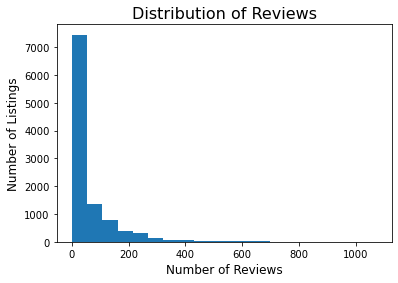

In [97]:
plt.hist(x = listings['number_of_reviews'], bins = 20)
plt.title('Distribution of Reviews', fontsize = 16)
plt.xlabel('Number of Reviews', fontsize = 12)
plt.ylabel('Number of Listings', fontsize = 12);

In [98]:
sql = """
SELECT AVG(rating) AS avg_rating, MIN(rating) AS min_rating, MAX(rating) AS max_rating
FROM listings;
"""

df = sqldf(sql)
df.head()

,avg_rating,min_rating,max_rating
0,4.677944,0.0,5.0


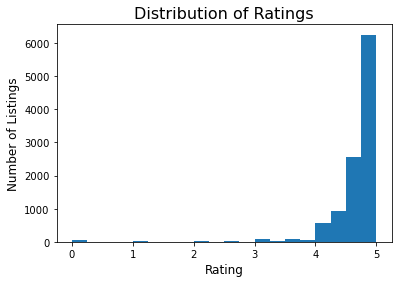

In [99]:
plt.hist(x = listings['rating'], bins = 20)
plt.title('Distribution of Ratings', fontsize = 16)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Number of Listings', fontsize = 12);

In [100]:
sql = """
SELECT COUNT(rating) AS perfect_ratings
FROM listings
WHERE rating = 5;
"""

df = sqldf(sql)
df.head()

,perfect_ratings
0,2170


In [101]:
sql = """
SELECT COUNT(rating) AS between_4_5
FROM listings
WHERE rating BETWEEN 4 AND 5;
"""

df = sqldf(sql)
df.head()

,between_4_5
0,10310


In [102]:
sql = """
SELECT COUNT(rating) AS under_4
FROM listings
WHERE rating < 4;
"""

df = sqldf(sql)
df.head()

,under_4
0,354


/Users/petermurphy/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


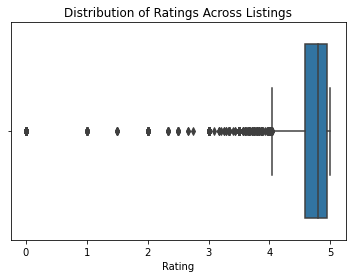

In [103]:
sns.boxplot(listings['rating'])
plt.title('Distribution of Ratings Across Listings')
plt.xlabel('Rating');

In [104]:
sql = """
SELECT AVG([price]) AS avg_price, MIN(price) AS min_price, MAX(price) AS max_price
FROM listings;
"""

df = sqldf(sql)
df.head()

,avg_price,min_price,max_price
0,32.129501,0.0,999.0


/Users/petermurphy/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


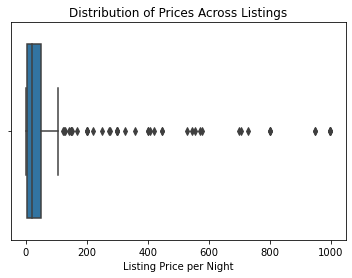

In [105]:
sns.boxplot(listings['price'])
plt.title('Distribution of Prices Across Listings')
plt.xlabel('Listing Price per Night');

In [106]:
listings['price'].describe()

count    10664.000000
mean        32.129501
std         45.801612
min          0.000000
25%          5.000000
50%         20.000000
75%         50.000000
max        999.000000
Name: price, dtype: float64

In [107]:
# upper bound 
50 + (1.5*45)

117.5

In [108]:
sql = """
SELECT COUNT(DISTINCT id) AS potential_outliers
FROM listings
WHERE price >= 117.5;
"""

df = sqldf(sql)
df.head()

,potential_outliers
0,32


In [109]:
sql = """
SELECT COUNT(DISTINCT id) AS distinct_listings_at_0, COUNT(id) AS listings_at_0
FROM listings
WHERE price = 0;
"""

df = sqldf(sql)
df.head()

,distinct_listings_at_0,listings_at_0
0,658,1309


In [110]:
sql = """
SELECT COUNT(DISTINCT id) AS distinct_listings_at_0, COUNT(id) AS listings_at_0
FROM listings
WHERE price = 0;
"""

df = sqldf(sql)
df.head()

,distinct_listings_at_0,listings_at_0
0,658,1309


In [111]:
listings[listings['price'] == 0][['price','rating','host_name']] # significant amount of properties with $0 price per night

,price,rating,host_name
4,0.0,4.78,Anne
9,0.0,4.97,Robert
12,0.0,4.73,Michelle
14,0.0,4.75,Michelle
16,0.0,4.41,Hermina
...,...,...,...
10649,0.0,4.70,Julia
10655,0.0,4.90,Maria And Jose
10659,0.0,4.95,Aziz
10660,0.0,5.00,Cici


In [112]:
sql = """
SELECT AVG(amenities_count) AS avg_num_amenities, MIN(amenities_count) AS min_amenities, MAX(amenities_count) AS max_amenities
FROM listings
"""

df = sqldf(sql)
df.head()

,avg_num_amenities,min_amenities,max_amenities
0,29.765848,1,93


In [113]:
sql = """
SELECT AVG(amenities_count) AS avg_num_amenities
FROM listings
WHERE price = 0
"""

df = sqldf(sql)
df.head()

,avg_num_amenities
0,26.159664


In [114]:
sql = """
SELECT AVG(amenities_count) AS avg_num_amenities 
FROM listings
WHERE price > 117.5
"""

df = sqldf(sql)
df.head()

,avg_num_amenities
0,32.75


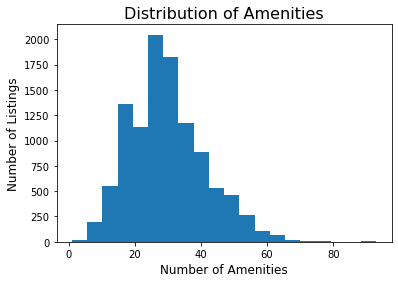

In [115]:
plt.hist(x = listings['amenities_count'], bins=20)
plt.title('Distribution of Amenities', fontsize = 16)
plt.xlabel('Number of Amenities', fontsize = 12)
plt.ylabel('Number of Listings', fontsize = 12);

In [116]:
listings['property_type'].value_counts()[:16]

Entire rental unit                     4317
Private room in rental unit            1536
Private room in residential home        944
Entire condominium (condo)              654
Private room in home                    512
Entire residential home                 345
Entire condo                            329
Entire serviced apartment               296
Entire guest suite                      215
Entire home                             211
Private room in condominium (condo)     177
Private room in townhouse               159
Room in boutique hotel                  159
Private room in bed and breakfast       145
Entire townhouse                        142
Entire loft                             103
Name: property_type, dtype: int64

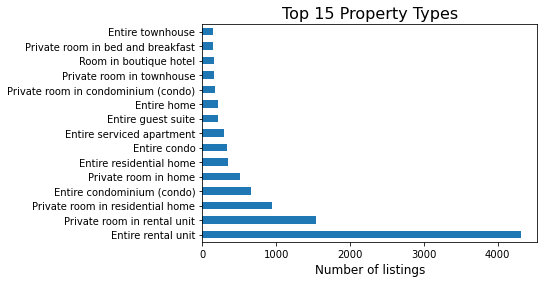

In [117]:
listings['property_type'].value_counts()[:15].plot(kind = 'barh')
plt.title('Top 15 Property Types', fontsize = 16)
plt.xlabel('Number of listings', fontsize = 12);

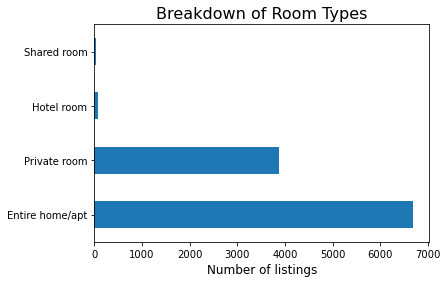

In [118]:
listings['room_type'].value_counts().plot(kind = 'barh')
plt.title('Breakdown of Room Types', fontsize = 16)
plt.xlabel('Number of listings', fontsize = 12);

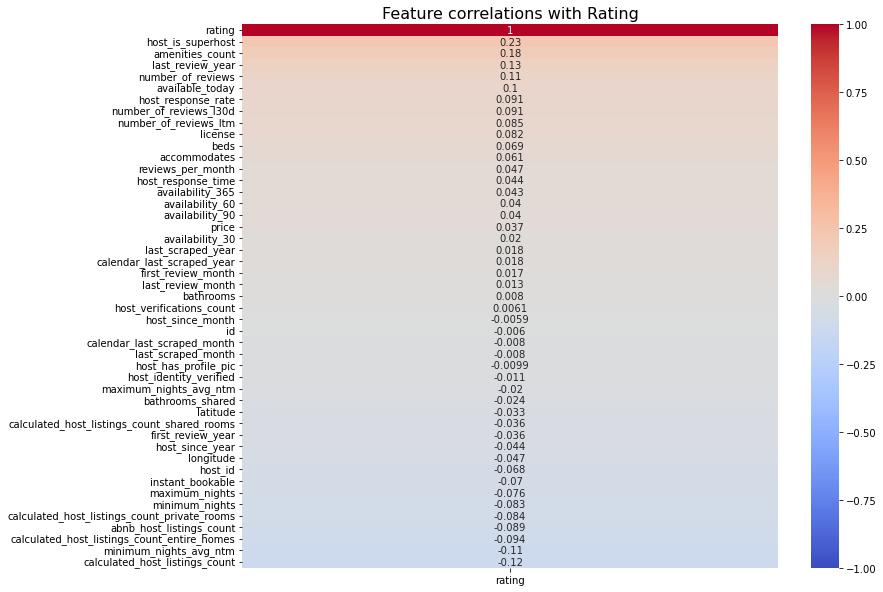

In [119]:
# checking correlations to target
plt.figure(figsize = (12, 10))
sns.heatmap(listings.corr()[['rating']].sort_values(by = 'rating', ascending = False),
            annot = True,
            vmin = -1,
            vmax = 1,
           cmap = 'coolwarm')
plt.title('Feature correlations with Rating', fontsize = 16);
# no strong correlations are immeditely jumping out

In [120]:
listings[['rating', 'price']].corr()

,rating,price
rating,1.000000,0.037031
price,0.037031,1.000000


In [121]:
### availability by price and rating 
# creating availability slices
available_t = listings[listings['available_today'] == 1]
not_available_t = listings[listings['available_today'] == 0]
available_30 = listings[listings['availability_30'] == 1]
not_available_30 = listings[listings['availability_30'] == 0]
available_60 = listings[listings['availability_60'] == 1]
not_available_60 = listings[listings['availability_60'] == 0]
available_90 = listings[listings['availability_90'] == 1]
not_available_90 = listings[listings['availability_90'] == 0]
available_365 = listings[listings['availability_365'] == 1]
not_available_365 = listings[listings['availability_365'] == 0]

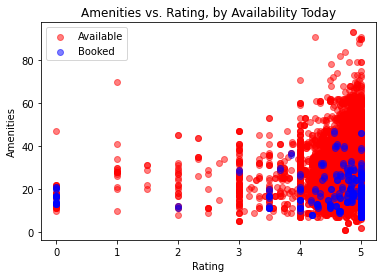

In [122]:
# plotting for today
plt.title('Amenities vs. Rating, by Availability Today')

plt.scatter(available_t['rating'],
           available_t['amenities_count'],
           color = 'r', alpha = 0.5, label = 'Available')
plt.scatter(not_available_t['rating'],
           not_available_t['amenities_count'],
           color = 'b', alpha = 0.5, label = 'Booked')
plt.xlabel('Rating')
plt.ylabel('Amenities')
plt.legend();

# can see that the properties booked now typically have higher ratings (but not necesarily more amenities) than those 
# for the listings that are booked further in advance, people appear to look for more amenities on average

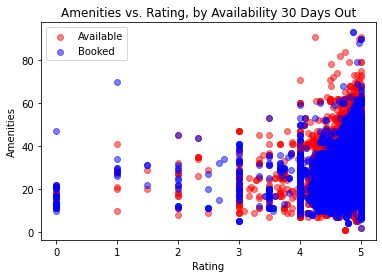

In [123]:
# plotting for 30 days out
plt.title('Amenities vs. Rating, by Availability 30 Days Out')

plt.scatter(available_30['rating'],
           available_30['amenities_count'],
           color = 'r', alpha = 0.5, label = 'Available')
plt.scatter(not_available_30['rating'],
           not_available_30['amenities_count'],
           color = 'b', alpha = 0.5, label = 'Booked')
plt.xlabel('Rating')
plt.ylabel('Amenities')
plt.legend();

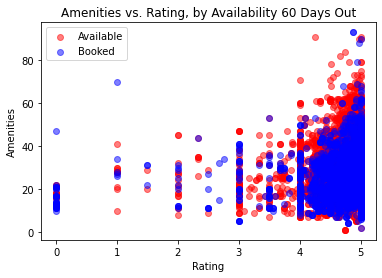

In [124]:
# plotting for 60 days out
plt.title('Amenities vs. Rating, by Availability 60 Days Out')

plt.scatter(available_60['rating'],
           available_60['amenities_count'],
           color = 'r', alpha = 0.5, label = 'Available')
plt.scatter(not_available_60['rating'],
           not_available_60['amenities_count'],
           color = 'b', alpha = 0.5, label = 'Booked')
plt.xlabel('Rating')
plt.ylabel('Amenities')
plt.legend();

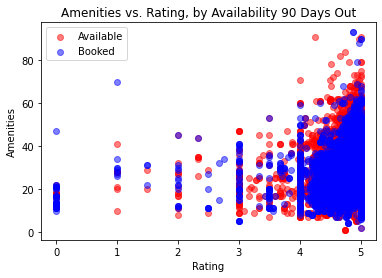

In [125]:
# plotting for 90 days out
plt.title('Amenities vs. Rating, by Availability 90 Days Out')

plt.scatter(available_30['rating'],
           available_30['amenities_count'],
           color = 'r', alpha = 0.5, label = 'Available')
plt.scatter(not_available_30['rating'],
           not_available_30['amenities_count'],
           color = 'b', alpha = 0.5, label = 'Booked')
plt.xlabel('Rating')
plt.ylabel('Amenities')
plt.legend();

----
### By Hosts

In [126]:
sql = """
SELECT COUNT(DISTINCT host_id) AS num_hosts
FROM listings
"""

host = sqldf(sql)
host.head()

,num_hosts
0,1733


In [127]:
sql = """
SELECT DISTINCT(host_id), host_name, COUNT(id) AS number_listings
FROM listings
GROUP BY host_id
ORDER BY COUNT(id) DESC
"""

host = sqldf(sql)
host.head(10)

,host_id,host_name,number_listings
0,22348222,Maverick,248
1,212359760,Evonify,171
2,814298,Thatch,171
3,275849638,Steven,122
4,331225367,Boston Strong,109
5,18517776,Huggy,108
6,30283594,Global Luxury Suites,104
7,365116307,Brian + Heather,103
8,71783,Lance,94
9,285344759,Bv,93


In [128]:
sql = """
SELECT DISTINCT(host_id), host_name, host_since
FROM listings
ORDER BY host_since
"""

host = sqldf(sql)
host.head(10)

,host_id,host_name,host_since
0,4804,Frank,2008-12-03 00:00:00.000000
1,6094,Matt,2009-01-06 00:00:00.000000
2,7969,Carolyn,2009-02-15 00:00:00.000000
3,8229,Terry,2009-02-19 00:00:00.000000
4,26988,Anne,2009-07-22 00:00:00.000000
5,38997,Michelle,2009-09-16 00:00:00.000000
6,63575,Kate,2009-12-16 00:00:00.000000
7,69587,Boris & Susan,2010-01-11 00:00:00.000000
8,69838,Mara,2010-01-12 00:00:00.000000
9,71783,Lance,2010-01-19 00:00:00.000000


In [129]:
sql = """
SELECT host_is_superhost, AVG(host_response_rate) AS avg_response_rate, AVG(rating) AS avg_rating, AVG(price) AS avg_price
FROM listings
GROUP BY host_is_superhost
"""

host = sqldf(sql)
host.head()

,host_is_superhost,avg_response_rate,avg_rating,avg_price
0,0,94.986125,4.595628,32.520600
1,1,98.775062,4.839400,31.362399


In [130]:
sql = """
SELECT COUNT(*) as num_superhosts
FROM listings
WHERE host_is_superhost = 1
"""

host = sqldf(sql)
host.head()

,num_superhosts
0,3601


In [131]:
sql = """
SELECT COUNT(*) as num_non_superhosts
FROM listings
WHERE host_is_superhost = 0
"""

host = sqldf(sql)
host.head()

,num_non_superhosts
0,7063


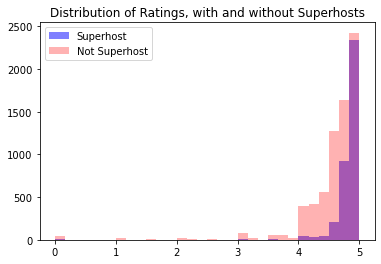

In [132]:
superhost = listings[listings['host_is_superhost'] == 1]
not_superhost = listings[listings['host_is_superhost'] == 0]

plt.hist(superhost['rating'], color = 'b', alpha = 0.5, label = 'Superhost', bins = 30)
plt.hist(not_superhost['rating'], color = 'r', alpha = 0.3, label = 'Not Superhost', bins = 30)
plt.legend()
plt.title('Distribution of Ratings, with and without Superhosts');

In [133]:
sql = """
SELECT license, AVG(host_response_rate) AS avg_response_rate, AVG(rating) AS avg_rating, AVG(price) AS avg_price
FROM listings
GROUP BY license
"""

host = sqldf(sql)
host.head()

,license,avg_response_rate,avg_rating,avg_price
0,0,94.852800,4.624614,26.754244
1,1,97.095727,4.709282,35.288075


In [134]:
sql = """
SELECT COUNT(*) as num_non_licensed_hosts
FROM listings
WHERE license = 0
"""

host = sqldf(sql)
host.head()

,num_non_licensed_hosts
0,3947


In [135]:
sql = """
SELECT COUNT(*) as num_licensed_hosts
FROM listings
WHERE license = 1
"""

host = sqldf(sql)
host.head()

,num_licensed_hosts
0,6717


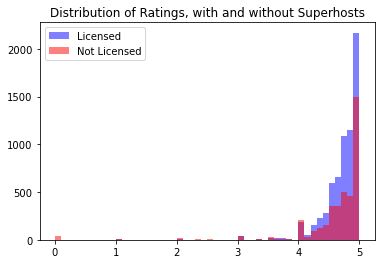

In [136]:
licensed = listings[listings['license'] == 1]
not_licensed = listings[listings['license'] == 0]

plt.hist(licensed['rating'], color = 'b', alpha = 0.5, label = 'Licensed', bins = 50)
plt.hist(not_licensed['rating'], color = 'r', alpha = 0.5, label = 'Not Licensed', bins = 50)
plt.legend()
plt.title('Distribution of Ratings, with and without Superhosts');

In [137]:
sql = """
SELECT COUNT(*) as num_licensed_hosts
FROM listings
WHERE license = 1
"""

host = sqldf(sql)
host.head()

,num_licensed_hosts
0,6717


In [138]:
listings[['host_is_superhost','license','host_identity_verified','host_has_profile_pic']].corr()

,host_is_superhost,license,host_identity_verified,host_has_profile_pic
host_is_superhost,1.000000,0.170352,-0.031580,0.010039
license,0.170352,1.000000,0.109034,0.025254
host_identity_verified,-0.031580,0.109034,1.000000,0.047932
host_has_profile_pic,0.010039,0.025254,0.047932,1.000000


In [139]:
sql = """
SELECT COUNT(*) as num_non_id_hosts
FROM listings
WHERE host_identity_verified = 0
"""

host = sqldf(sql)
host.head()

,num_non_id_hosts
0,1830


In [140]:
sql = """
SELECT COUNT(*) as num_id_hosts
FROM listings
WHERE host_identity_verified = 1
"""

host = sqldf(sql)
host.head()

,num_id_hosts
0,8834


In [141]:
sql = """
SELECT host_identity_verified, AVG(host_response_rate) AS avg_response_rate, AVG(rating) AS avg_rating, AVG(price) AS avg_price
FROM listings
GROUP BY host_identity_verified
"""

host = sqldf(sql)
host.head()

,host_identity_verified,avg_response_rate,avg_rating,avg_price
0,0,96.043169,4.690546,27.574863
1,1,96.311637,4.675334,33.073013


In [142]:
sql = """
SELECT COUNT(*) as num_non_pic_hosts
FROM listings
WHERE host_has_profile_pic = 0
"""

host = sqldf(sql)
host.head()

,num_non_pic_hosts
0,18


In [143]:
sql = """
SELECT COUNT(*) as num_pic_hosts
FROM listings
WHERE host_has_profile_pic = 1
"""

host = sqldf(sql)
host.head()

,num_pic_hosts
0,10646


In [144]:
listings[['host_name', 'rating', 'price']].sort_values(by = ['rating', 'price'], ascending=False)

,host_name,rating,price
526,Jeff,5.0,999.0
2771,Jeff,5.0,999.0
5061,Jeff,5.0,999.0
7396,Jeff,5.0,999.0
8380,Michael,5.0,950.0
...,...,...,...
5463,Crystal,0.0,0.0
7290,Kayla,0.0,0.0
7322,Damandeep,0.0,0.0
7746,Crystal,0.0,0.0


In [145]:
listings[['number_of_reviews','calculated_host_listings_count']].corr()

,number_of_reviews,calculated_host_listings_count
number_of_reviews,1.000000,-0.096454
calculated_host_listings_count,-0.096454,1.000000


-----
### By Neighborhood

In [146]:
sql = """
SELECT neighborhood, COUNT(id) AS listings_per_neighborhood
FROM listings
GROUP BY neighborhood
ORDER BY COUNT(id) DESC;
"""

neigh = sqldf(sql)
neigh

,neighborhood,listings_per_neighborhood
0,Dorchester,1264
1,Allston,950
2,Downtown,856
3,Roxbury,816
4,East Boston,722
5,South End,709
6,Jamaica Plain,697
7,Brighton,695
8,Back Bay,590
9,Charlestown,496


In [147]:
# where are the highest priced listings?
sql = """
SELECT neighborhood, AVG(price) AS avg_price, MAX(price) AS max_price, MIN(price) AS min_price, COUNT(id) AS listings_per_neighborhood
FROM listings
GROUP BY neighborhood
ORDER BY avg_price DESC;
"""

neigh = sqldf(sql)
neigh

,neighborhood,avg_price,max_price,min_price,listings_per_neighborhood
0,Leather District,191.375000,999.0,20.0,8
1,Downtown,52.096963,999.0,0.0,856
2,Back Bay,46.062712,406.0,0.0,590
3,Fenway,44.597964,579.0,0.0,393
4,South Boston Waterfront,42.549296,99.0,0.0,71
5,West End,42.333333,99.0,0.0,132
6,Beacon Hill,42.200483,325.0,0.0,414
7,Chinatown,41.324324,100.0,0.0,111
8,North End,40.430279,99.0,0.0,251
9,South End,37.667137,950.0,0.0,709


In [148]:
neighborhood_vars = ['price', 'longitude', 'latitude', 'neighborhood']
neighborhood = listings[neighborhood_vars]
neighborhood = neighborhood.loc[neighborhood["price"] > 0]

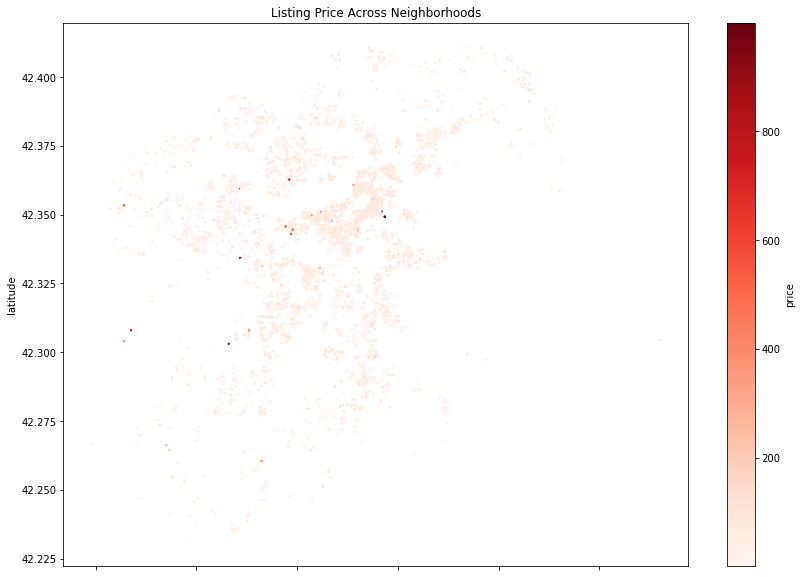

In [149]:
# this code was inspired by lesson 7.05 on Transfer Learning
neighborhood.plot(kind="scatter", x="longitude", y="latitude", c="price",
         cmap="Reds", figsize=(14, 10), s=2)
plt.title('Listing Price Across Neighborhoods');

In [150]:
# where are the highest rating listings?
sql = """
SELECT neighborhood, AVG(rating) AS avg_rating, MAX(rating) AS max_rating, MIN(rating) AS min_rating, COUNT(id) AS listings_per_neighborhood
FROM listings
GROUP BY neighborhood
ORDER BY avg_rating DESC;
"""

neigh = sqldf(sql)
neigh

,neighborhood,avg_rating,max_rating,min_rating,listings_per_neighborhood
0,Harbor Islands,4.934000,5.0,4.79,10
1,West Roxbury,4.851469,5.0,4.00,143
2,Leather District,4.828750,5.0,4.67,8
3,Charlestown,4.761351,5.0,1.00,496
4,Roslindale,4.748982,5.0,0.00,226
5,Roxbury,4.740711,5.0,1.00,816
6,Longwood Medical Area,4.740000,5.0,2.00,78
7,Allston,4.735411,5.0,0.00,950
8,Hyde Park,4.734720,5.0,1.00,161
9,Jamaica Plain,4.727016,5.0,0.00,697


In [151]:
neighborhood_vars = ['rating', 'longitude', 'latitude', 'neighborhood']
neighborhood = listings[neighborhood_vars]

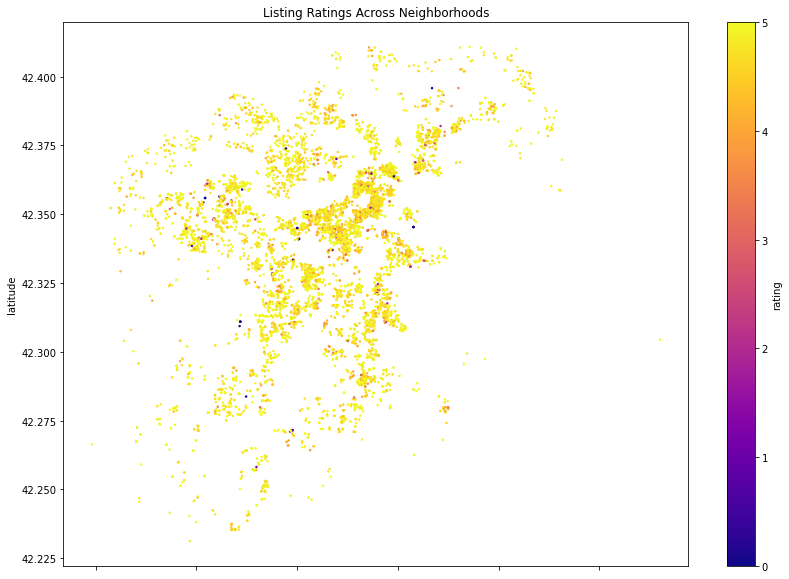

In [152]:
neighborhood.plot(kind="scatter", x="longitude", y="latitude", c="rating",
         cmap="plasma", figsize=(14, 10), s=2)
plt.title('Listing Ratings Across Neighborhoods');
# no clear ratings differential across neighborhoods

In [153]:
# which neighborhoods have listings with the most amenities?
sql = """
SELECT neighborhood, AVG(amenities_count) AS avg_num_amenities, COUNT(id) AS listings_per_neighborhood
FROM listings
GROUP BY neighborhood
ORDER BY avg_num_amenities DESC;
"""

neigh = sqldf(sql)
neigh

,neighborhood,avg_num_amenities,listings_per_neighborhood
0,Harbor Islands,49.400000,10
1,Hyde Park,34.335404,161
2,West End,32.893939,132
3,West Roxbury,32.531469,143
4,Dorchester,32.443038,1264
5,Chinatown,32.144144,111
6,Jamaica Plain,31.804878,697
7,Mattapan,31.375887,141
8,East Boston,31.015235,722
9,Charlestown,30.911290,496


In [154]:
neighborhood_vars = ['amenities_count', 'longitude', 'latitude', 'neighborhood']
neighborhood = listings[neighborhood_vars]

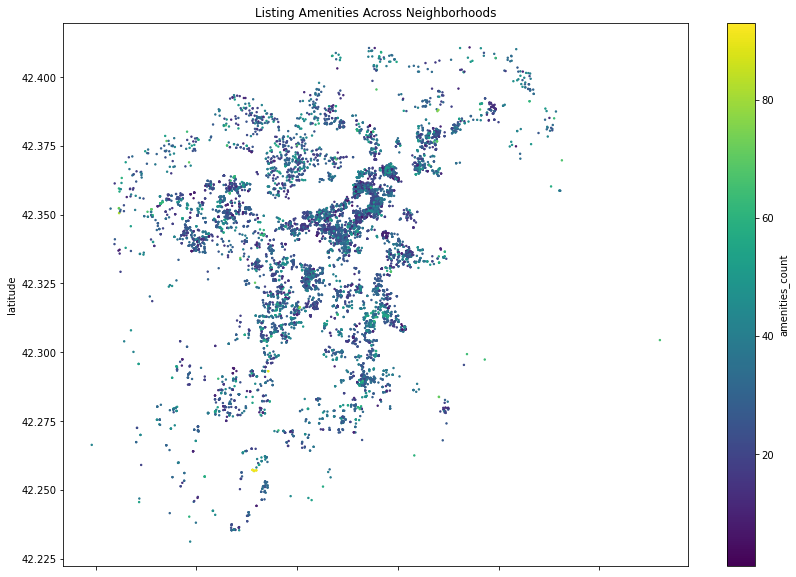

In [155]:
neighborhood.plot(kind="scatter", x="longitude", y="latitude", c="amenities_count",
         cmap="viridis", figsize=(14, 10), s=2)
plt.title('Listing Amenities Across Neighborhoods');

In [156]:
# which neighborhoods have listings with the most availability?
sql = """
SELECT neighborhood, AVG(available_today) AS avg_avail_today, AVG(availability_30) AS avg_avail_30days, AVG(availability_60) AS avg_avail_60days, AVG(availability_90) AS avg_avail_90days, AVG(availability_365) AS avg_avail_year_out, COUNT(id) AS listings_per_neighborhood
FROM listings
GROUP BY neighborhood
ORDER BY avg_avail_today;
"""

neigh = sqldf(sql)
neigh

,neighborhood,avg_avail_today,avg_avail_30days,avg_avail_60days,avg_avail_90days,avg_avail_year_out,listings_per_neighborhood
0,Leather District,0.750000,0.250000,0.375000,0.375000,0.500000,8
1,South Boston Waterfront,0.830986,0.577465,0.647887,0.718310,0.746479,71
2,Fenway,0.933842,0.592875,0.694656,0.735369,0.781170,393
3,Allston,0.952632,0.510526,0.610526,0.686316,0.763158,950
4,West Roxbury,0.958042,0.573427,0.657343,0.692308,0.776224,143
5,Brighton,0.959712,0.538129,0.638849,0.713669,0.841727,695
6,South Boston,0.960199,0.676617,0.756219,0.793532,0.830846,402
7,Beacon Hill,0.963768,0.632850,0.746377,0.794686,0.855072,414
8,Chinatown,0.963964,0.729730,0.837838,0.855856,0.891892,111
9,Jamaica Plain,0.971306,0.543759,0.639885,0.684362,0.750359,697


In [157]:
# property type be neighborhood
# can target your airbnb search by neighborhood depending on the type of property set up you're looking for
sql = """
SELECT neighborhood, property_type, COUNT(property_type) AS num_properties
FROM listings
GROUP BY property_type
ORDER BY neighborhood, num_properties DESC;
"""

neigh = sqldf(sql)
neigh.head(10)

,neighborhood,property_type,num_properties
0,Allston,Private room in guesthouse,5
1,Allston,Shared room in condominium (condo),3
2,Allston,Entire villa,1
3,Allston,Shared room in condo,1
4,Back Bay,Room in boutique hotel,159
5,Bay Village,Shared room in boutique hotel,4
6,Charlestown,Private room in home,512
7,Charlestown,Boat,26
8,Charlestown,Shared room in rental unit,9
9,Dorchester,Entire townhouse,142


In [158]:
# this code was inspired by lesson 7.05 on Transfer Learning
# creating latitude and longitude data frame to cluster on
lat_lng = listings[['latitude','longitude']]

In [159]:
# cluster our observations by lat/long
km = KMeans(n_clusters=25, random_state=42)
km.fit(lat_lng)

KMeans(n_clusters=25, random_state=42)

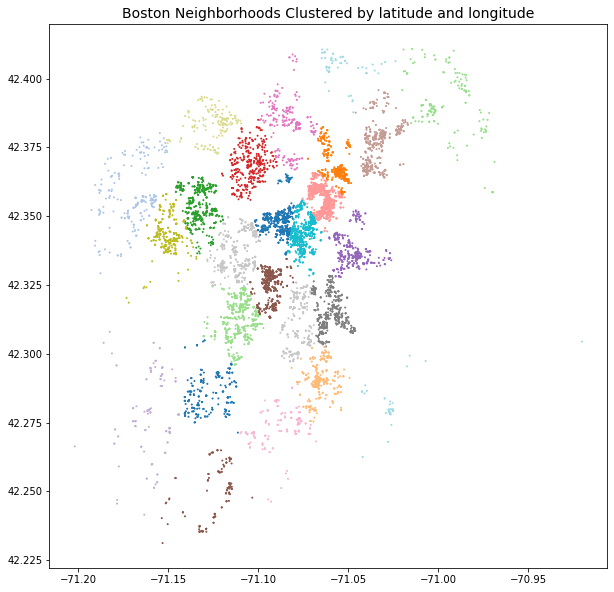

In [160]:
# Boston Neighborhoods visualized by clustering - potential to use clusters as features in modeling
plt.figure(figsize=(10, 10))
plt.scatter(listings.longitude, listings.latitude, c=km.labels_, s=1, cmap="tab20")
plt.title('Boston Neighborhoods Clustered by latitude and longitude', fontsize = 14);

-----
### By Listing

In [161]:
cluster = listings[['latitude','longitude', 'price', 'rating']]

# cluster our observations by lat/long and rating and price
# first w defaults
db = DBSCAN()
db.fit(cluster)

DBSCAN()

In [162]:
pd.Series(db.labels_).unique()

array([  0,   1,   2,   3,   4,   5,  -1,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108])

In [163]:
# increasing min sample size and decreasing epsilon to get less clusters
db = DBSCAN(eps = 0.5, min_samples = 70)
db.fit(cluster)
pd.Series(db.labels_).unique()

array([ 0, -1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       20, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 28, 27, 29, 31, 30])

In [164]:
sql = """
SELECT host_name, name, SUM(number_of_reviews) AS total_reviews, SUM(calculated_host_listings_count) AS number_listings
FROM listings
GROUP BY id
ORDER BY total_reviews DESC,number_listings DESC;
"""

prop = sqldf(sql)
prop.head()

,host_name,name,total_reviews,number_listings
0,Tiffany,Sanitized Modern 3BD private home-near BCEC,2766,4
1,Jason Or Jose,"Little Italy, Historic, Freedom Trail, TD Garden",2654,35
2,Jason Or Jose,"Little Italy Historic, Freedom Trail, TD Garden",2608,35
3,Boris & Susan,★ Spacious & Modern ★ Professionally Sanitized ★,2467,32
4,Caitlin & Dan,Private Apartment- Minutes from T!,2349,4


In [165]:
sql = """
SELECT property_type, COUNT(property_type) AS num_properties, AVG(rating) AS avg_rating
FROM listings
GROUP BY property_type
ORDER BY avg_rating DESC
"""

prop = sqldf(sql)
prop

# interesting that top 6 average ratings are shared format 
# having entire hotel room, condo, apartment, etc does not necessarily translate to good rating

,property_type,num_properties,avg_rating
0,Shared room in condominium (condo),3,5.000000
1,Shared room in condo,1,5.000000
2,Private room in cottage,1,5.000000
3,Entire villa,1,5.000000
4,Shared room in home,2,4.955000
5,Private room in villa,3,4.950000
6,Shared room in residential home,5,4.946000
7,Tiny home,1,4.940000
8,Room in bed and breakfast,4,4.932500
9,Houseboat,7,4.920000
